<a href="https://colab.research.google.com/github/byeori-jang/Deep-learning/blob/main/2025-09-30/DL_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

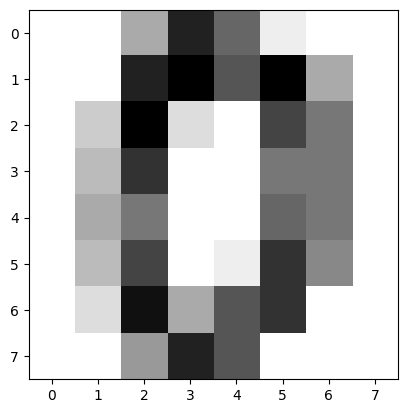

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [2]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.images.shape)   # (1797, 8, 8) → 샘플 수 1797, 8x8 이미지
print(digits.data.shape)     # (1797, 64)   → 8*8을 1D 벡터로 펴 놓은 것
print(digits.target.shape)


(1797, 8, 8)
(1797, 64)
(1797,)


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기
X = digits.data          # (1797, 64) → 벡터화된 입력
y = digits.target        # (1797,)    → 정수 레이블 (0~9)

In [5]:
Y= to_categorical(y, num_classes=10)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
# 모델 정의
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

model.summary() #딥러닝 모델의 구조와 파라미터 정보를 표로 보여줌

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1944 - loss: 4.3265 - val_accuracy: 0.6493 - val_loss: 1.1054
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5313 - loss: 1.4195 - val_accuracy: 0.8264 - val_loss: 0.6237
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.9297 - val_accuracy: 0.8924 - val_loss: 0.3942
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7827 - loss: 0.6173 - val_accuracy: 0.9306 - val_loss: 0.2613
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8071 - loss: 0.5056 - val_accuracy: 0.9097 - val_loss: 0.2466
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8797 - loss: 0.3626 - val_accuracy: 0.9306 - val_loss: 0.1881
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8704 - loss: 0.3605 - val_accuracy: 0.9375 - val_loss: 0.1556
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9094 - loss: 0.2996 - val_accuracy: 0.9306 - val_loss:

In [9]:
# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


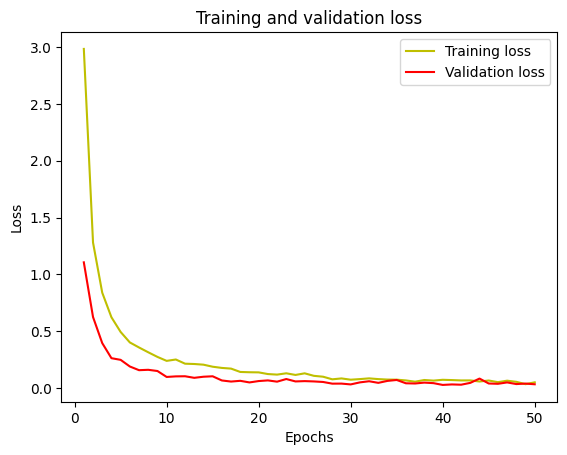

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       1.00      0.94      0.97        36
           3       0.90      0.97      0.93        29
           4       0.97      1.00      0.98        30
           5       0.95      0.97      0.96        40
           6       0.98      1.00      0.99        44
           7       1.00      1.00      1.00        39
           8       1.00      0.92      0.96        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.97       360
weighted avg       0.98      0.97      0.98       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  1  0  0  0]
 [ 0  0 34  2  0  0  0  0  0  0]
 [ 0  0  0 28  0  1  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0

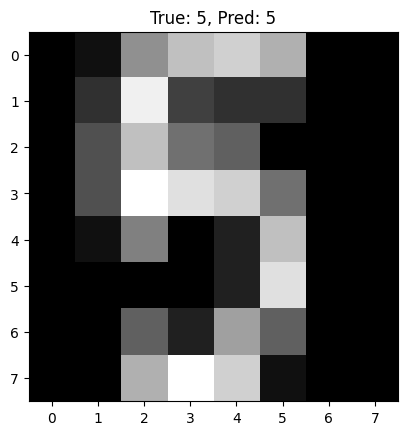

In [12]:
X_test_img = X_test.reshape(-1, 8, 8)
y_pred_labels = np.argmax(y_pred, axis=1)

n_samples = len(X_test_img)

i = np.random.randint(0, n_samples)
plt.imshow(X_test_img[i], cmap="gray")
plt.title(f"True: {np.argmax(y_test[i])}, Pred: {y_pred_labels[i]}")
plt.show()